# Customer Analysis Results



<i> We analyse  customer vehicle insurance data including demographics, education, employment, policy details, vehicle information, and claim amounts. We then report to the senior management.  The goal is to improve corporate services and  profitability. </i>
    
 **CONTENTS:**  visualizations of (precleaned) customer data <br>
      </p>
        - Probability distributions (histograms with fitting) <br>
        - Heat maps (showing correlations in features) <br>
        - Bar charts <br>
        
**Insight:**
- Monthly auto premiums correlate with number of claims at the level or $r=0.6$
- The most popular coverage is basic coverage for personal vehicle polices.
- Most customers don't respond.

        
 
        


##### packages and boiler plate functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import norm
import math
%matplotlib inline
pd.options.display.max_rows = 100
import warnings

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def col_rename(df, dict_rules, ip=True):
    ''' rename columns in data frame using a dictionary of rules  '''
    if isinstance(df,pd.core.frame.DataFrame) and isinstance(dict_rules,dict):
        z = df.rename(columns = dict_rules, inplace=ip)
    else:
        raise TypeError
    return z
#
def print_unique(df,col):
    ''' gives a list of unique values in a field '''
    if isinstance(df,pd.core.frame.DataFrame) and isinstance(col,pd.core.frame.Series):
        z = df[col].unique()
    else:
        raise TypeError
    return z
#
def lower_case_column_names(df):
    ''' make columns lower case '''
    if isinstance(df,pd.core.frame.DataFrame):
        df.columns= [i.lower() for i in df.columns]
        df.columns = df.columns.str.replace(' ', '_')
    else: 
        raise TypeError
    return df

def Remove_Outlier_Indices(df):
    """ returns a df of boolean values to used to index a trimmed table in the 1.5*IQR range"""
    Q1 = df.quantile(0.05)
    Q3 = df.quantile(0.95)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 -  1.5*IQR)) |(df > (Q3 + 1.5*IQR)))
    return trueList

##  Analysis
CONTENTS: 
  -  PDFs/Histograms
  -  Correlations
  -  Gaussianity determination
  -  Frequency counts and aggregations
  -  Pearson correlation heat map


### Read the data

In [3]:
c_df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv') # read in the cleaned data from Nelson

In [4]:
c_df.select_dtypes(include=np.number).columns.tolist() # fields

['Unnamed: 0',
 'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [5]:
c_df.drop(labels=['Unnamed: 0'],axis=1,inplace=True) # drop the unnamed field

In [6]:
numericals_df   = c_df.select_dtypes(include=np.number) # get numerical columns using the select_dtypes method
categoricals_df = c_df.select_dtypes(include=object)    # get cat columns  

###  Histograms

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

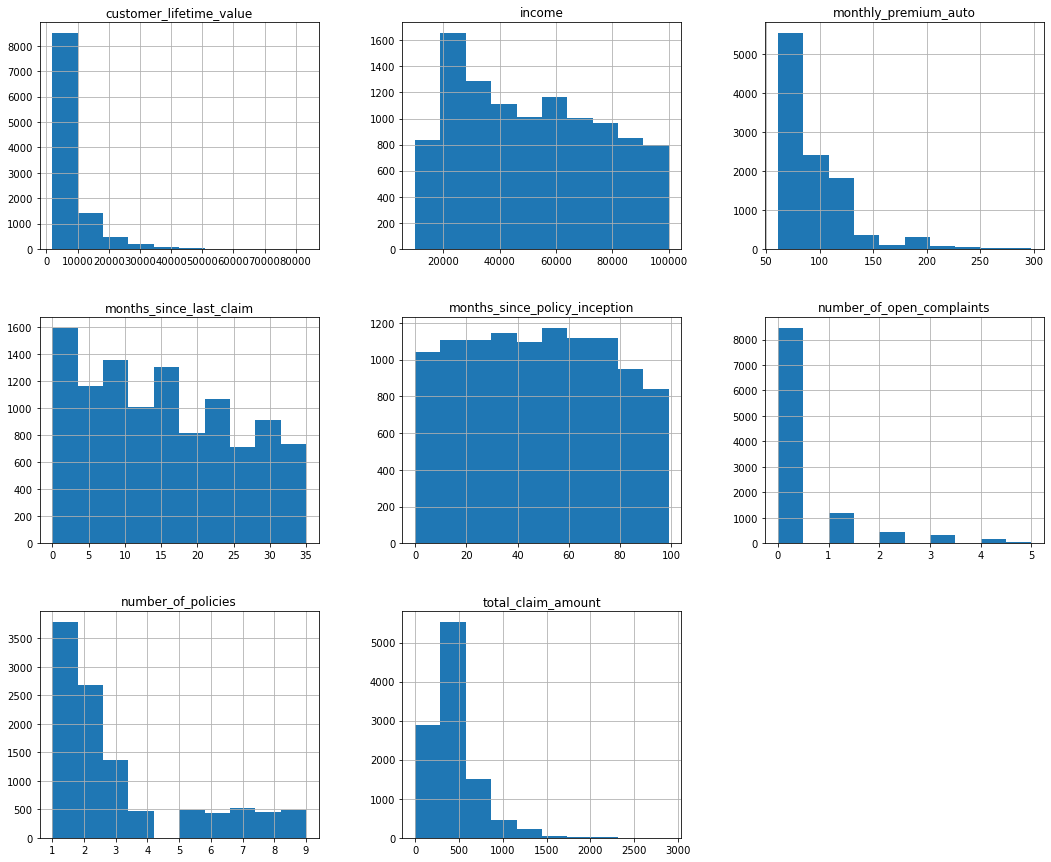

In [7]:
numericals_df.hist(figsize=(18,15)) # make histograms

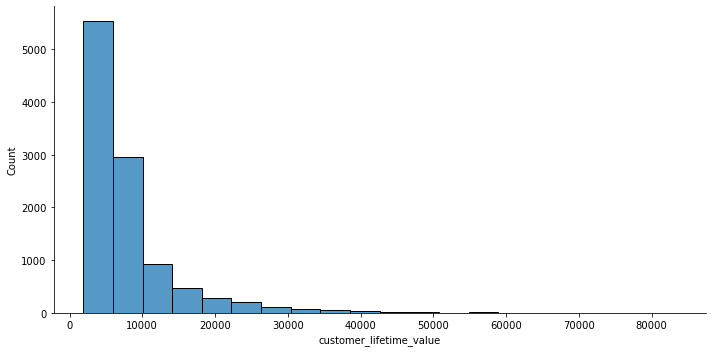

In [8]:
sns.displot(numericals_df['customer_lifetime_value'], bins=20,aspect=2)

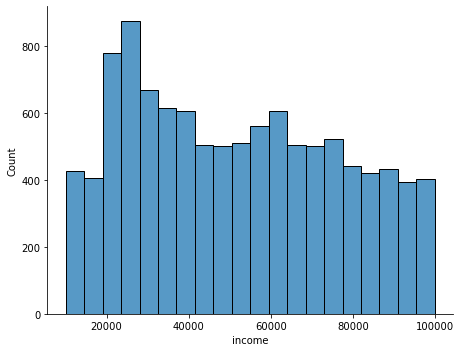

In [9]:
sns.displot(numericals_df['income'], bins=20, aspect=1.3)

<i> the number_of_open_complaints and number_of_policies fields are discrete so we remove them below

In [10]:
n_data = [x for x in numericals_df.columns] # list of columns
n_data

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [11]:
# remove the discrete fields
n_data.remove('number_of_open_complaints')
n_data.remove('number_of_policies')

#### Distributions 

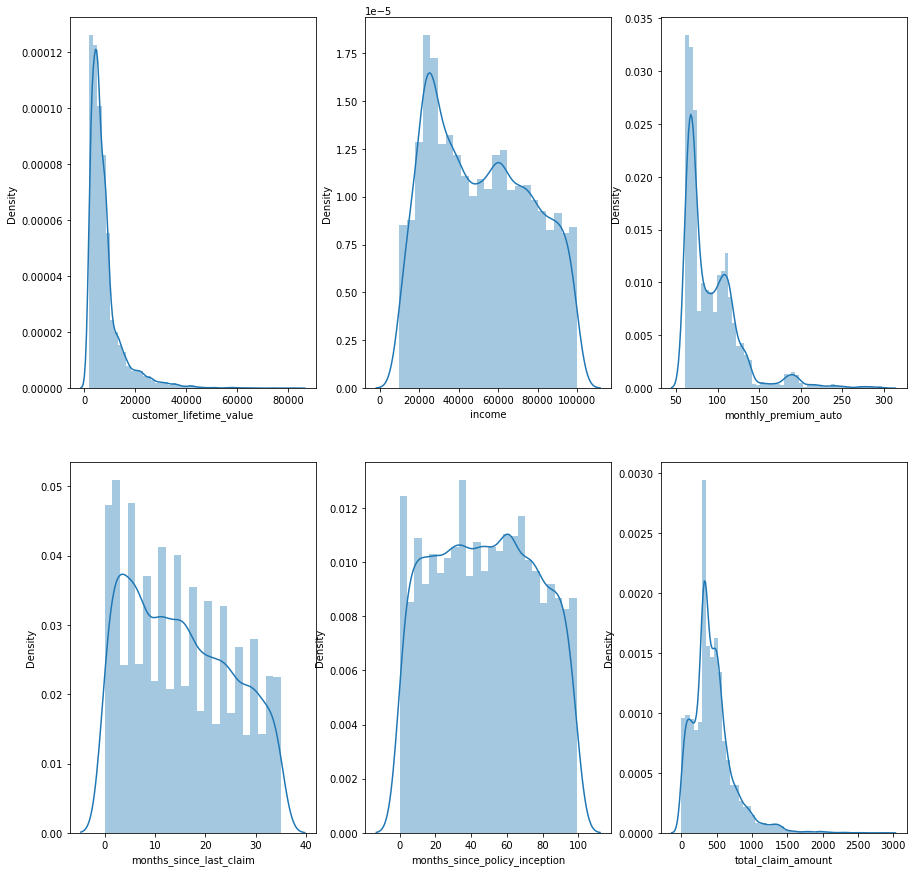

In [12]:
fig, axes = plt.subplots(ncols=3, nrows=2,figsize=(15,15))
# generate canvas of plots
for i, ax in zip(range(6), axes.flat):
    sns.distplot(c_df[n_data[i]], ax=ax, kde=True)
plt.show()

##### Experimental (not relevant to management)

<AxesSubplot:ylabel='Density'>

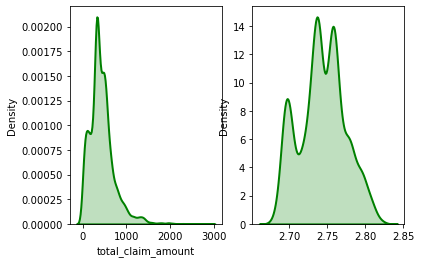

In [13]:
# transform training data & save lambda value
fitted_data, fitted_lambda = boxcox(numericals_df['customer_lifetime_value'])
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(numericals_df['total_claim_amount'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

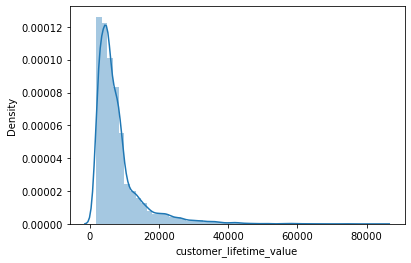

In [14]:
sns.distplot(numericals_df['customer_lifetime_value'])

<AxesSubplot:ylabel='Density'>

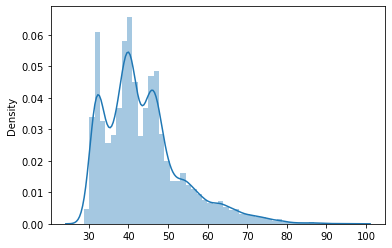

In [15]:
cust_lifetime_boxcox = boxcox(numericals_df['customer_lifetime_value'],lmbda=.3)
sns.distplot(cust_lifetime_boxcox)

In [16]:
numericals_df.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,-0.000276,0.404235,0.012466,0.017055,-0.028099,0.016789,0.232849
income,-0.000276,1.000000,-0.010804,-0.018013,0.011509,0.013057,-0.001515,-0.118201
monthly_premium_auto,0.404235,-0.010804,1.000000,0.006959,0.019696,-0.002423,-0.018805,0.630149
months_since_last_claim,0.012466,-0.018013,0.006959,1.000000,-0.036883,-0.002617,0.006791,0.008979
months_since_policy_inception,0.017055,0.011509,0.019696,-0.036883,1.000000,0.004368,-0.009719,0.004186
number_of_open_complaints,-0.028099,0.013057,-0.002423,-0.002617,0.004368,1.000000,0.002748,-0.007332
number_of_policies,0.016789,-0.001515,-0.018805,0.006791,-0.009719,0.002748,1.000000,-0.008019
total_claim_amount,0.232849,-0.118201,0.630149,0.008979,0.004186,-0.007332,-0.008019,1.000000


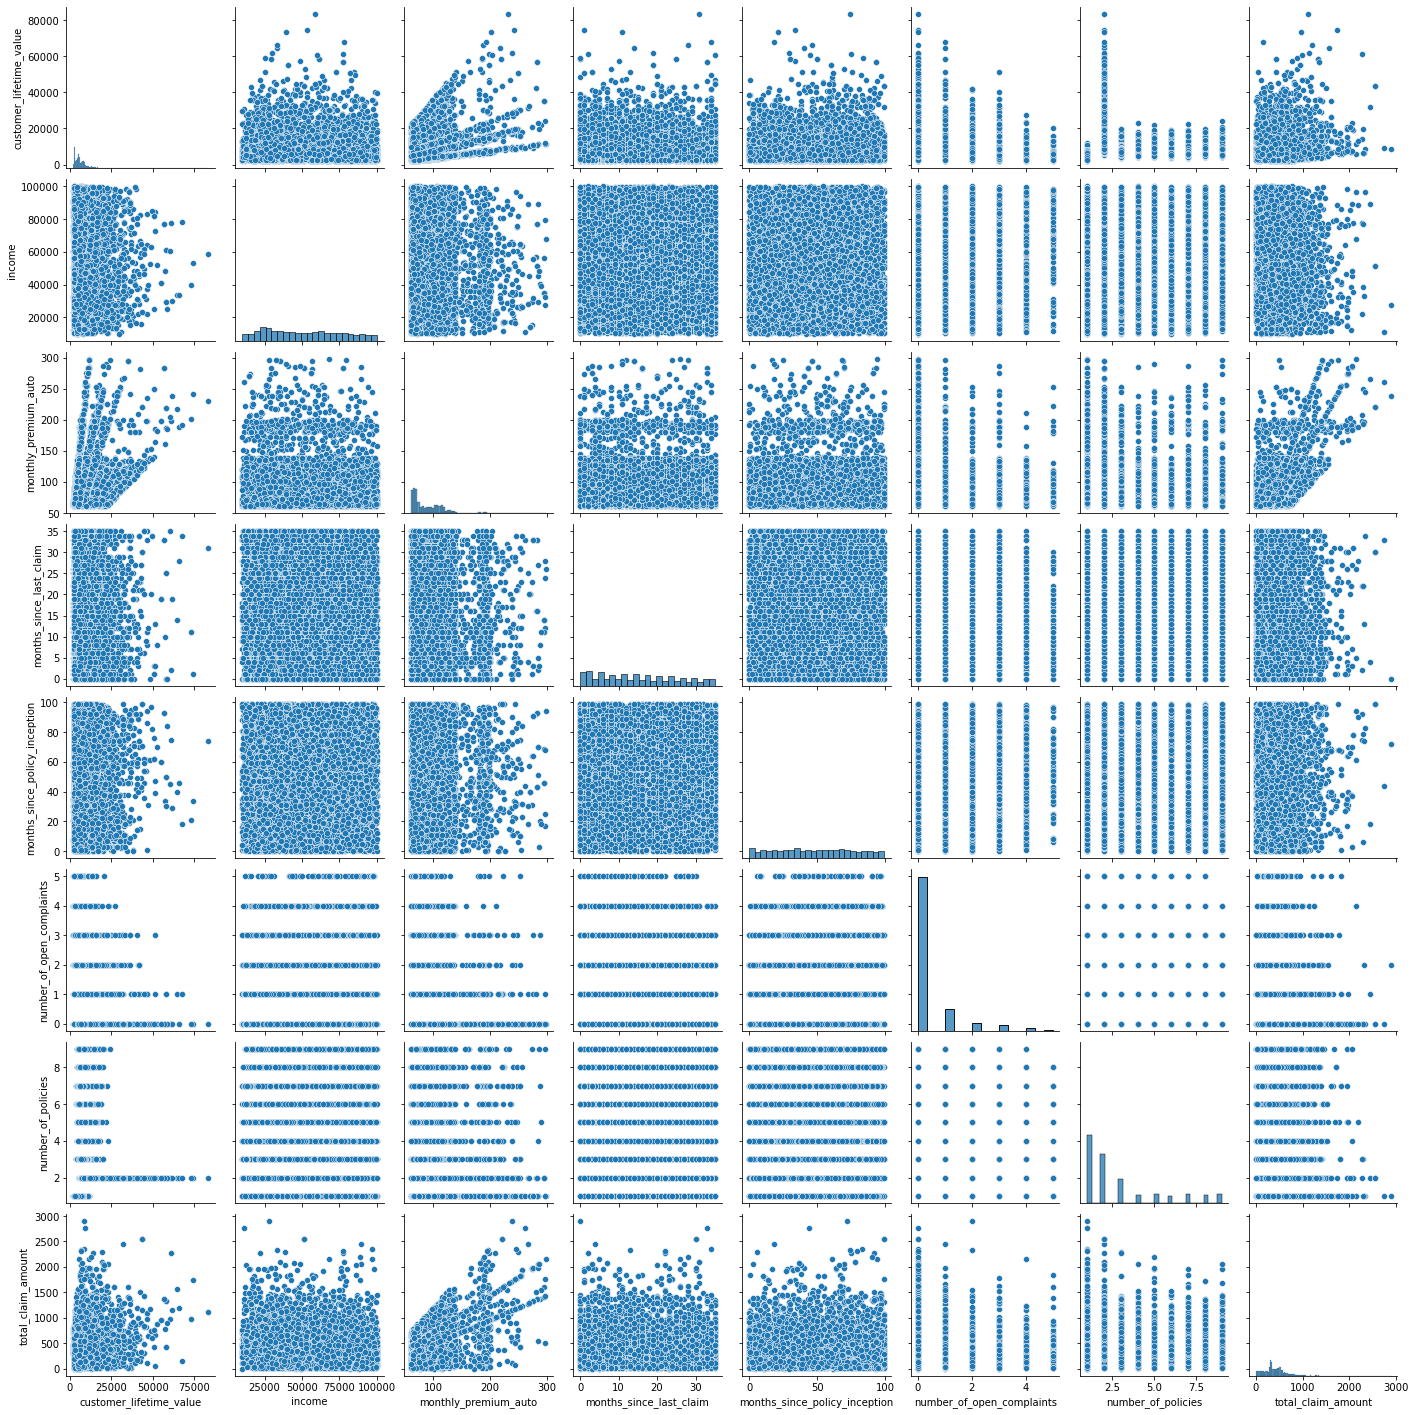

In [17]:
sns.pairplot(numericals_df)

##### HEATMAP 

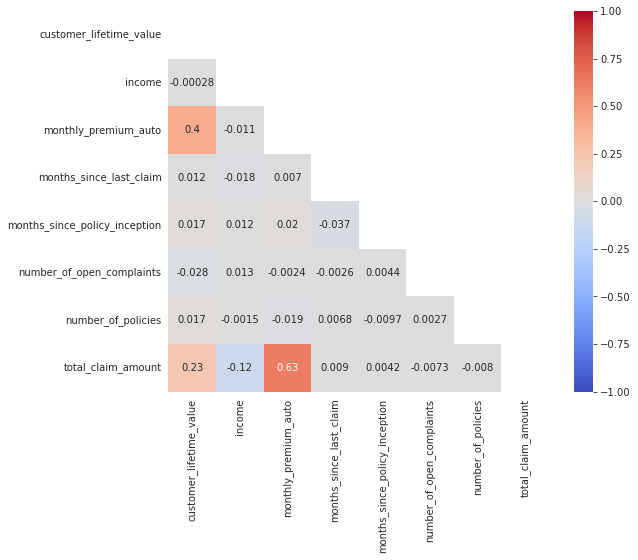

In [18]:
n_corr = numericals_df.corr()
mask = np.zeros_like(n_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(n_corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

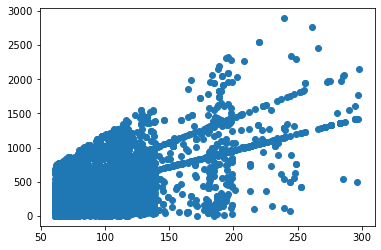

In [19]:
plt.scatter(x=numericals_df['monthly_premium_auto'], y=numericals_df['total_claim_amount'])
plt.show()

In [20]:
numericals_df['monthly_premium_auto']

0         61
1         64
2        100
3         97
4        117
        ... 
10684    253
10685     65
10686    201
10687    158
10688    101
Name: monthly_premium_auto, Length: 10689, dtype: int64

#### Observations
- Negligible multicolinearity in the data
- Modest correlation (r=approx .6) between total_claim_amount and monthly_premium_auto. Customer_lifetime_value is moderatedly correlated (r=.4) with monthly_premium_auto and total_claim_amount (r=.25) as well. The months_since_last_claim and monthly_premium_auto are expected to be anticorrelated, but this is not observed.


#### Highly Correlated Columns (absence of)

In [21]:
corr_thresh    =  0.5
corr_abs       = n_corr.abs()
upper_triangle = corr_abs.where(np.triu(np.ones(corr_abs.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > corr_thresh)]

['total_claim_amount']

### Categorical representations

<AxesSubplot:title={'center':'Coverage count by policy type'}, xlabel='policy_type', ylabel='count'>

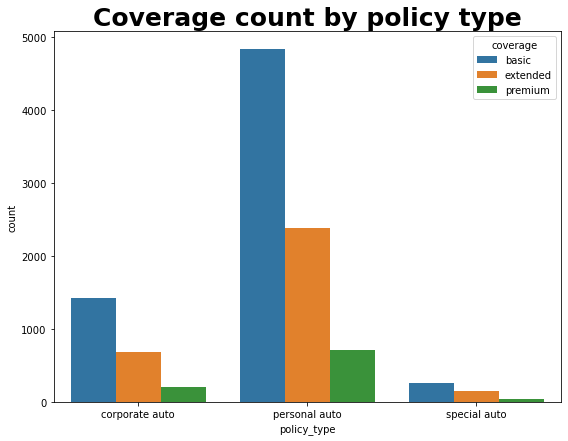

In [22]:
policy_cvg_counts_df = categoricals_df.groupby(['policy_type',\
                                                'coverage'])['policy'].count().rename('count').reset_index()
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Coverage count by policy type', size='25', fontweight='bold')

sns.barplot(x = policy_cvg_counts_df['policy_type'],y = policy_cvg_counts_df['count'], hue = policy_cvg_counts_df['coverage'])

<AxesSubplot:xlabel='income'>

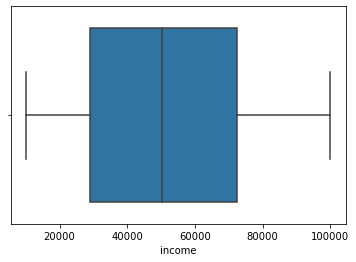

In [23]:
sns.boxplot(x="income",data=numericals_df)

### Customer responses 
**SUMMARY**
-  total number of responses (most customers don't respond)
-  response by the sales channel (Agent sales have highes number of responses)
-  response by the total claim amount (low claim amounts dominate)
-  response by income (middle incomes)


### Read and clean  

In [24]:
c2_df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round2.csv')

In [25]:
c2_df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [26]:
c2_df.drop(labels=['Unnamed: 0'],axis=1,inplace=True) # drop the unnamed field

In [27]:
lower_case_column_names(c2_df).head() # make headers uniformly lower case
c2_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

###  Overall responses 

Text(0, 0.5, 'count')

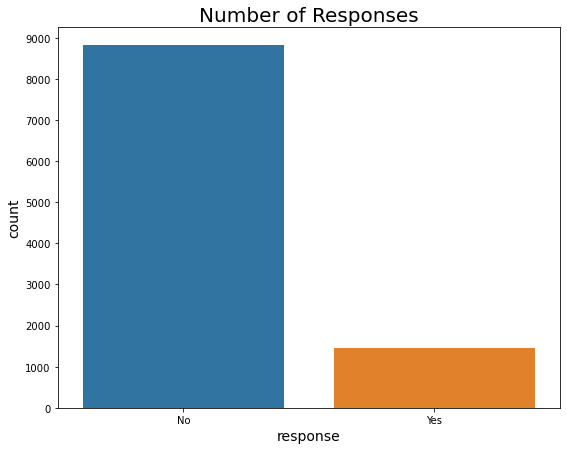

In [28]:
plt.figure(figsize=(9,7))
#plt.subplot(2,2,1)
plt.title('Number of Responses', size='20')
plt.yticks(np.arange(0,10000,1000))
sns.countplot(c2_df['response']) 
plt.xlabel('response',size=14)
plt.ylabel('count',size=14)

In [29]:
response_cnt = c2_df.groupby('sales_channel')['response'].value_counts()
type(response_cnt)

pandas.core.series.Series

In [30]:
response_cnt

sales_channel  response
Agent          No          3148
               Yes          742
Branch         No          2539
               Yes          326
Call Center    No          1792
               Yes          221
Web            No          1334
               Yes          177
Name: response, dtype: int64

In [31]:
#plt.figure(figsize=(12,10))
#plt.subplot(2,2,1)
#plt.title('Coverage count by policy type', size='25', fontweight='bold')
#sns.barplot(x = response_cnt['sales_channel'],y = response_cnt['count'], hue = response_cnt['response'])

### Responses for selected categories

#### Response by the sales channel

<AxesSubplot:title={'center':'Response by Sales Channel'}, xlabel='sales_channel', ylabel='count'>

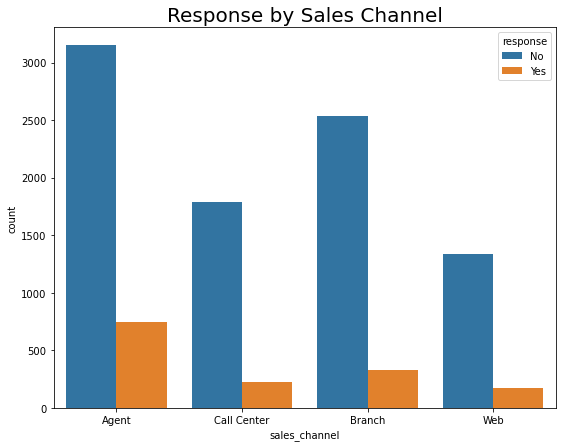

In [32]:
plt.figure(figsize=(9,7))
plt.title('Response by Sales Channel', size='20')

sns.countplot(x=c2_df['sales_channel'], hue=c2_df['response']) 

#### Response by the total claim amount

##### calculations 

In [33]:
max_claim = round(c2_df['total_claim_amount'].max())
inter = math.floor(max_claim/4)
quarts = [math.ceil(inter*i) for i in range(0,4)]
quarts

[0, 723, 1446, 2169]

In [34]:
chopped_claim_amounts = pd.cut(c2_df['total_claim_amount'],4,\
    labels=['c1:(0,723]','c2:(723,1447]','c3:(1447,2170])','c4:(2170,2893]'])

In [35]:
pd.cut(c2_df['total_claim_amount'],4) # split claims into 4 uniform bins

0          (-2.794, 723.384]
1        (723.384, 1446.669]
2          (-2.794, 723.384]
3          (-2.794, 723.384]
4          (-2.794, 723.384]
                ...         
10905    (723.384, 1446.669]
10906      (-2.794, 723.384]
10907      (-2.794, 723.384]
10908      (-2.794, 723.384]
10909    (723.384, 1446.669]
Name: total_claim_amount, Length: 10910, dtype: category
Categories (4, interval[float64, right]): [(-2.794, 723.384] < (723.384, 1446.669] < (1446.669, 2169.955] < (2169.955, 2893.24]]

In [36]:
#pd.qcut(c2_df['total_claim_amount'],[0, .25, .5, .75, 1.])

In [37]:
""" plt.figure(figsize=(9,7))
plt.title('Total claim amount by sales channel', size='20')
#plt.xlabel('quartiles of total sales [2893]' )
ax = sns.countplot(x=pd.qcut(c2_df['total_claim_amount'],[0, .25, .5, .75, 1.],labels=['q1','q2','q3','q4']), hue=c2_df['response']) 
ax.set_xlabel('quartiles of total sales [2893]') """

" plt.figure(figsize=(9,7))\nplt.title('Total claim amount by sales channel', size='20')\n#plt.xlabel('quartiles of total sales [2893]' )\nax = sns.countplot(x=pd.qcut(c2_df['total_claim_amount'],[0, .25, .5, .75, 1.],labels=['q1','q2','q3','q4']), hue=c2_df['response']) \nax.set_xlabel('quartiles of total sales [2893]') "

##### results

Text(0, 0.5, 'count')

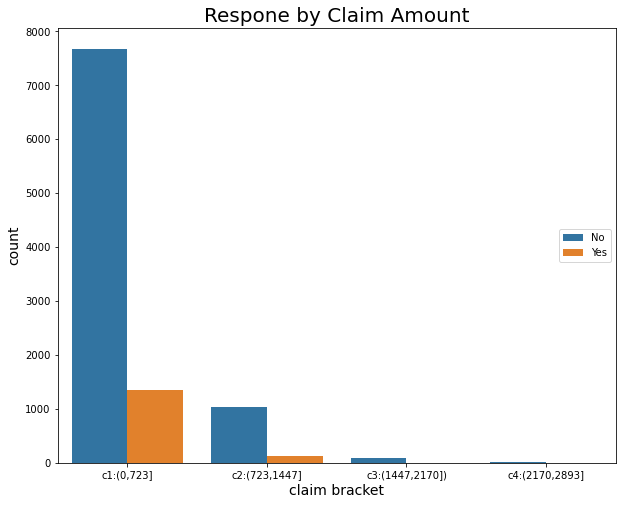

In [38]:
plt.figure(figsize=(10,8))
plt.title('Respone by Claim Amount', size='20')
#plt.xlabel('quartiles of total sales [2893]' )
ax = sns.countplot(x=chopped_claim_amounts, hue=c2_df['response']) 
ax.set_xlabel('claim bracket', size=14)
plt.legend(loc='right')
plt.ylabel('count',size=14)

The claims tend to be in the lowest bracket 

#### Response by income

##### calculations 

In [39]:
c2_df['income'].max()

99981

In [40]:
income_bins = [int(99981*x+.001) for x in [0,.25,.5,.75,1]]
bins = [0,25000,50000,75000,100000]
bins

[0, 25000, 50000, 75000, 100000]

In [41]:
income_cut = pd.cut(c2_df['income'],bins, labels=['<25k','25k to 50k','50k to 75k','75k to 100k'],\
                    duplicates='drop')#,include_lowest=True)

#####  results

Text(0, 0.5, 'count')

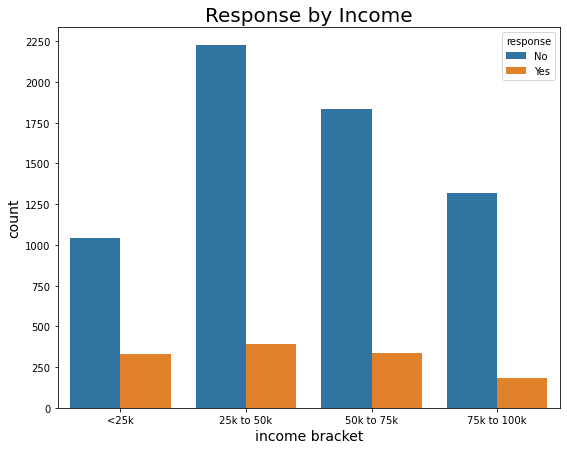

In [42]:
plt.figure(figsize=(9,7))
plt.title('Response by Income', size='20')
#plt.xlabel('quartiles of total sales [2893]' )
ax = sns.countplot(x=income_cut, hue=c2_df['response']) 
ax.set_xlabel('income bracket',size=14)
ax.set_yticks(np.arange(0,2500,250))
plt.ylabel('count',size=14)

The number of yes responses is **nearly uniform** across income brackets

In [43]:
categoricals_df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


Drop highly correlated columns

### Transform data for modeling

#### Encoding

In [44]:
encoded_features = pd.get_dummies(categoricals_df, drop_first=True)
encoded_features


,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


#### Remove outliers (numerical data outsider IQR)

In [45]:
# Index List of Non-Outliers
nonOutlierList = Remove_Outlier_Indices(numericals_df)
# Non-Outlier Subset of the Given Datasetnu
num_df_trimmed = numericals_df[nonOutlierList.all(1)]


In [46]:
num_df_trimmed

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


#### Separate the target variable

In [47]:
X_t = num_df_trimmed.drop('total_claim_amount', axis=1) # trimmed target var
y_t = num_df_trimmed.total_claim_amount # trimmed independent var (vec)

In [48]:
X = numericals_df.drop('total_claim_amount', axis=1)
y = numericals_df.total_claim_amount # trimmed independent var (vec)

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

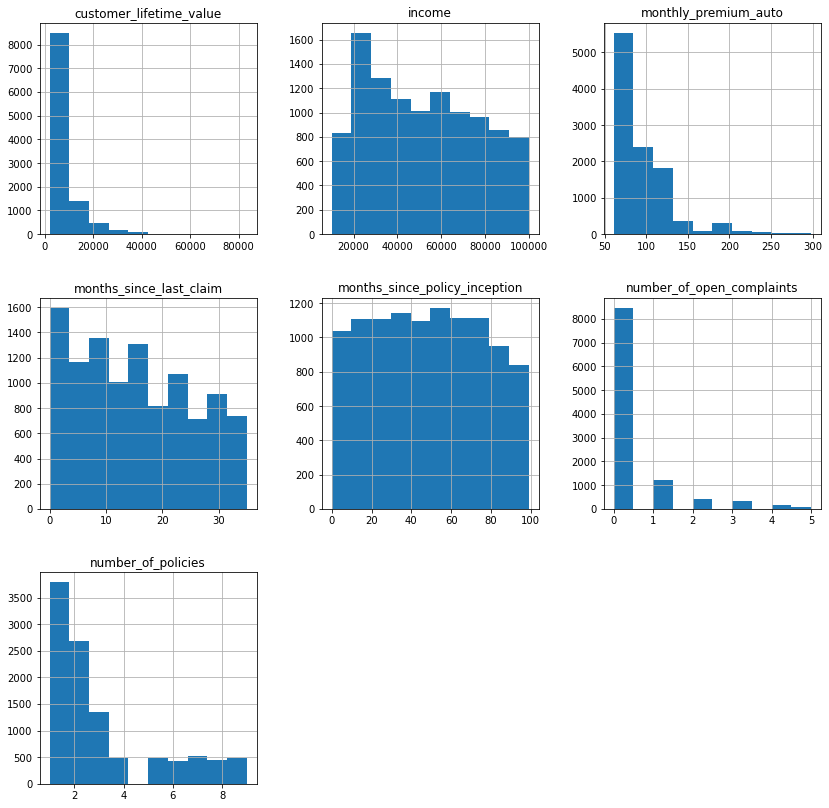

In [49]:
X.hist(figsize=(14,14))

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

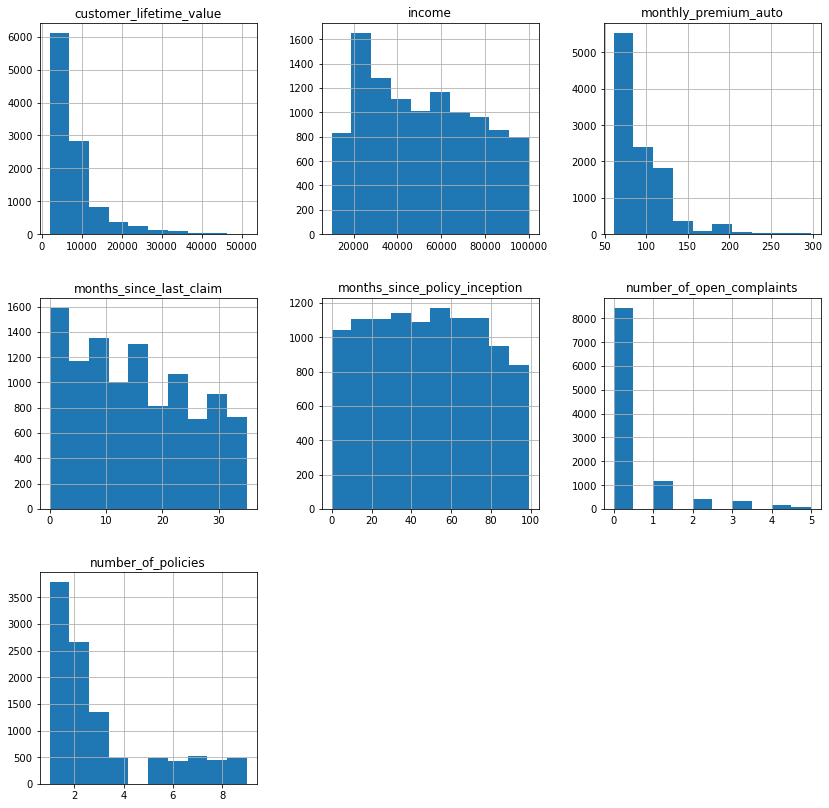

In [50]:
X_t.hist(figsize=(14,14))

<AxesSubplot:>

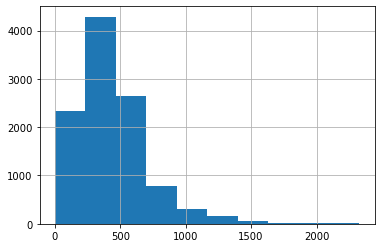

In [51]:
y_t.hist()

<AxesSubplot:>

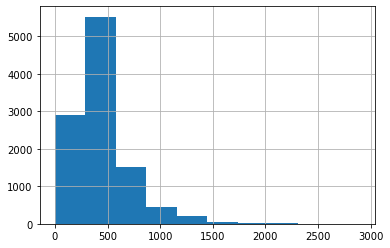

In [52]:
y.hist()

In [53]:
X_t

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,26794,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,15,31,1,7
...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


#### Data splitting

In [54]:
TEST_SIZE = .30
RANDOM_STATE = 123 # reproduce the same results. disables randomization

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,random_state=RANDOM_STATE)


In [56]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
6608,7271,20545,70,23,86,0,2
5697,5079,17922,68,6,95,0,5
10524,4428,58577,110,6,62,0,1
397,22332,49078,97,10,3,0,2
6324,2430,67280,70,29,30,0,1
...,...,...,...,...,...,...,...
9785,3086,73938,76,34,48,0,1
7763,5658,78834,72,14,20,2,8
5218,2434,23033,62,5,9,0,1
1346,23594,76358,66,25,3,0,2


In [57]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_t, y_t, test_size=TEST_SIZE, 
                                                        random_state=RANDOM_STATE) # trimmed data


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

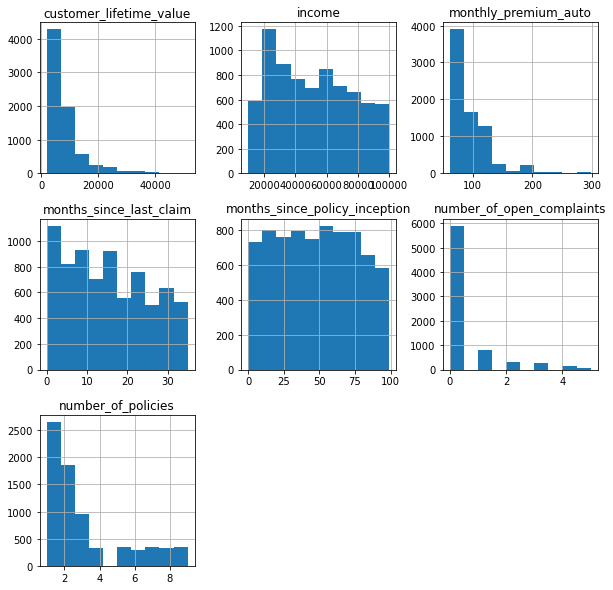

In [58]:
Xt_train.hist(figsize=(10,10))

#### Standardize

In [59]:
# Scale indepedenent variable
# Standardize features by removing the mean and scaling to unit variance.
std_scaler     = StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled  = std_scaler.transform(X_test) # use the same parameters from the training set [same scaling]

# Standardize features by removing the mean and scaling to unit variance. [for trimmed data]
std_scaler_trimmed = StandardScaler().fit(Xt_train)
Xt_train_scaled    = std_scaler_trimmed.transform(Xt_train)
Xt_test_scaled     = std_scaler_trimmed.transform(Xt_test)

In [60]:
print(X_train_scaled.mean(axis=0), " \n", X_train_scaled.std(axis=0))
print(Xt_train_scaled.mean(axis=0), " \n", Xt_train_scaled.std(axis=0)) # cleaned "trimmed" data

[-4.93828151e-17  7.40742227e-17  3.32384332e-17  5.65053365e-17
  4.98576499e-18 -2.94397552e-17  2.16049816e-17]  
 [1. 1. 1. 1. 1. 1. 1.]
[-4.85564512e-17 -1.48049572e-16 -1.89703390e-16 -5.61731494e-17
  8.75920296e-17  1.35672437e-17  5.71252367e-17]  
 [1. 1. 1. 1. 1. 1. 1.]


### Apply linear regression model

In [66]:
model = LinearRegression()           # model
model.fit(X_train_scaled, y_train)   # model train
y_pred       = model.predict(X_test_scaled)   # model prediction [test]
y_pred_train = model.predict(X_train_scaled)  # model prediction [train]
result = pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

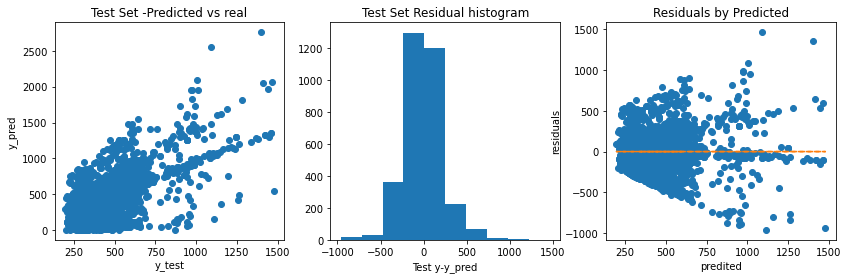

In [67]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

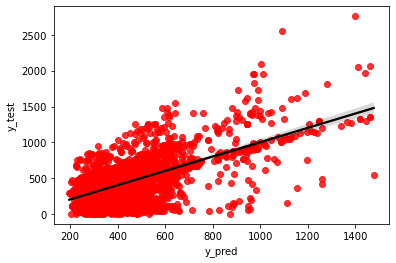

In [68]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [69]:
# CLEANED DATA
model_trimmed = LinearRegression()              # model
model_trimmed.fit(Xt_train_scaled, yt_train)    # model train
yt_pred       = model.predict(Xt_test_scaled)   # model prediction [test]
yt_pred_train = model.predict(Xt_train_scaled)  # model prediction [train]
result_trimmed= pd.DataFrame({"y_test":yt_test,"y_pred":yt_pred})

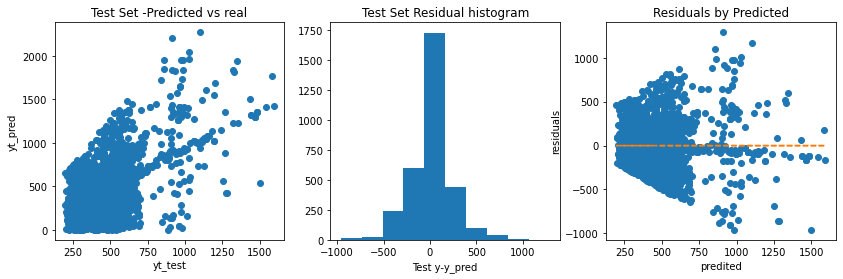

In [70]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(yt_pred, yt_test, 'o')
ax[0].set_xlabel("yt_test")
ax[0].set_ylabel("yt_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(yt_test - yt_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(yt_pred,(yt_test - yt_pred),"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(yt_pred,np.zeros(len(yt_pred)),linestyle='dashed')

In [73]:
print(mse(y_test,y_pred), mse(yt_test,yt_pred))

49141.88291586501 50066.57055940206


In [75]:
print(r2_score(y_test,y_pred), r2_score(yt_test,yt_pred))

0.4108749202229439 0.3949318116064624


For some wierd reason the cleaned data gives a slightly worse residual error.